# 인덱스 도출 - 다양한 시도

In [1]:
from keras import optimizers
from keras.models import Sequential, Model
from keras.layers import Dense,Input
import pandas as pd
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
import os

Using TensorFlow backend.


In [2]:
# 데이터 모두 합친 파일 가져오기 
filenames = os.listdir('../data/total2/')
filenames

['01_hagye1.csv',
 '02_sanggye2.csv',
 '03_gyonam.csv',
 '04_sanggye10.csv',
 '05_sanggye5.csv',
 '06_sanggye2.csv',
 '07_sanggye67.csv',
 '08_sanggye1.csv',
 '09_sanggye67.csv',
 '10_jongno1234.csv',
 '11_jongno1234.csv',
 '12_jongno1234.csv',
 '13_jongno1234.csv',
 '14_jongno1234.csv',
 '15_jongno1234.csv',
 '16_jongno1234.csv',
 '17_hagye1.csv',
 '18_sanggye2.csv',
 '19_gongneung1.csv',
 '20_gongneung1.csv',
 '21_gongneung2.csv',
 '22_wolgye3.csv',
 '23_junggye23.csv',
 '24_sanggye2.csv',
 '25_sanggye5.csv',
 '26_sanggye67.csv',
 '27_jongno1234.csv',
 '28_sanggye34.csv',
 '29_changsin1.csv',
 '30_buam.csv',
 '31_sajik.csv',
 '32_jongno1234.csv',
 '33_changsin1.csv',
 '34_wolgye1.csv',
 '35_changsin3.csv',
 '36_cheongunhyoja.csv',
 '37_pyeongchang.csv',
 '38_hyehwa.csv',
 '39_gahoe.csv',
 '40_jongno56.csv',
 '41_hyehwa.csv',
 '42_gongneung2.csv',
 '43_ihwa.csv',
 '44_jongno1234.csv',
 '45_gahoe.csv',
 '46_gahoe.csv',
 '47_jongno1234.csv',
 '48_sungin2.csv',
 '49_jongno1234.csv',
 '50

In [3]:
# 빈 리스트 만들기
totaldata2 = []

# for문 돌려서 각 파일 불러온 후 리스트에 append
for name in filenames:
    totaldata2.append(pd.read_csv('../data/total2/'+name))

# 최종적으로 concat
rawdata = pd.concat(totaldata2)
rawdata

,Date,search,pm10,pm25,COUNT_T,TMST,retail
0,20180507,0.04172,96.467,43.400,101.0,3805.420,1.273
1,20180510,0.04172,67.648,31.915,244.0,4258.262,1.216
2,20180511,0.04172,110.924,71.296,192.0,4276.178,1.306
3,20180512,0.04172,39.515,24.293,56.0,3445.193,1.229
4,20180513,0.06258,20.664,12.441,130.0,3258.588,1.382
5,20180514,0.06258,92.687,65.110,313.0,3981.379,1.282
6,20180515,0.06258,87.309,61.238,273.0,4193.862,1.516
7,20180516,0.06258,41.908,27.438,228.0,4019.172,1.233
8,20180517,0.06258,18.190,7.539,185.0,4000.379,1.253
9,20180518,0.06258,10.677,3.328,107.0,4224.568,1.327


# Try 1

In [4]:
# 작업할 rawdata 가져오기
rawdata1 = rawdata[['pm10','pm25','search','COUNT_T','TMST','retail']]
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail
0,96.467,43.400,0.04172,101.0,3805.420,1.273
1,67.648,31.915,0.04172,244.0,4258.262,1.216
2,110.924,71.296,0.04172,192.0,4276.178,1.306
3,39.515,24.293,0.04172,56.0,3445.193,1.229
4,20.664,12.441,0.06258,130.0,3258.588,1.382
5,92.687,65.110,0.06258,313.0,3981.379,1.282
6,87.309,61.238,0.06258,273.0,4193.862,1.516
7,41.908,27.438,0.06258,228.0,4019.172,1.233
8,18.190,7.539,0.06258,185.0,4000.379,1.253
9,10.677,3.328,0.06258,107.0,4224.568,1.327


In [5]:
rawdata1['pm10+COUNT_T']=rawdata1['pm10']+rawdata1['COUNT_T']
rawdata1['pm10+TMST']=rawdata1['pm10']+rawdata1['TMST']
rawdata1['pm10+search']=rawdata1['pm10']+rawdata1['search']
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+COUNT_T,pm10+TMST,pm10+search
0,96.467,43.400,0.04172,101.0,3805.420,1.273,197.467,3901.887,96.50872
1,67.648,31.915,0.04172,244.0,4258.262,1.216,311.648,4325.910,67.68972
2,110.924,71.296,0.04172,192.0,4276.178,1.306,302.924,4387.102,110.96572
3,39.515,24.293,0.04172,56.0,3445.193,1.229,95.515,3484.708,39.55672
4,20.664,12.441,0.06258,130.0,3258.588,1.382,150.664,3279.252,20.72658
5,92.687,65.110,0.06258,313.0,3981.379,1.282,405.687,4074.066,92.74958
6,87.309,61.238,0.06258,273.0,4193.862,1.516,360.309,4281.171,87.37158
7,41.908,27.438,0.06258,228.0,4019.172,1.233,269.908,4061.080,41.97058
8,18.190,7.539,0.06258,185.0,4000.379,1.253,203.190,4018.569,18.25258
9,10.677,3.328,0.06258,107.0,4224.568,1.327,117.677,4235.245,10.73958


In [6]:
# 정규화
rawdata1 = (rawdata1-rawdata1.mean())/rawdata1.std()

In [7]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+COUNT_T,pm10+TMST,pm10+search
pm10,1.000000,0.942492,0.389581,0.601118,-0.067030,-0.119640,0.731873,-0.062997,0.999999
pm25,0.942492,1.000000,0.403678,0.561144,-0.049735,-0.095586,0.685175,-0.045930,0.942533
search,0.389581,0.403678,1.000000,0.526621,-0.162895,-0.266636,0.534483,-0.161360,0.390547
COUNT_T,0.601118,0.561144,0.526621,1.000000,0.045397,-0.111842,0.984523,0.047843,0.601451
TMST,-0.067030,-0.049735,-0.162895,0.045397,1.000000,0.738820,0.024010,0.999992,-0.067186
retail,-0.119640,-0.095586,-0.266636,-0.111842,0.738820,1.000000,-0.121605,0.738530,-0.119891
pm10+COUNT_T,0.731873,0.685175,0.534483,0.984523,0.024010,-0.121605,1.000000,0.026981,0.732157
pm10+TMST,-0.062997,-0.045930,-0.161360,0.047843,0.999992,0.738530,0.026981,1.000000,-0.063153
pm10+search,0.999999,0.942533,0.390547,0.601451,-0.067186,-0.119891,0.732157,-0.063153,1.000000


In [8]:
# 시각화 준비
import seaborn as sns
sns.set()

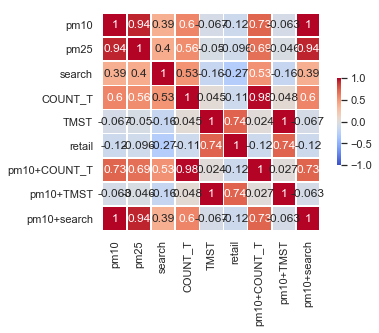

In [9]:
# 히트맵을 통한 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 2

In [10]:
rawdata1 = rawdata[['pm10','pm25','search','COUNT_T','TMST','retail']]
rawdata1['pm10*COUNT_T']=rawdata1['pm10']*rawdata1['COUNT_T']
rawdata1['pm10*TMST']=rawdata1['pm10']*rawdata1['TMST']
rawdata1['pm10*search']=rawdata1['pm10']*rawdata1['search']
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail,pm10*COUNT_T,pm10*TMST,pm10*search
0,96.467,43.400,0.04172,101.0,3805.420,1.273,9743.167,367097.451140,4.024603
1,67.648,31.915,0.04172,244.0,4258.262,1.216,16506.112,288062.907776,2.822275
2,110.924,71.296,0.04172,192.0,4276.178,1.306,21297.408,474330.768472,4.627749
3,39.515,24.293,0.04172,56.0,3445.193,1.229,2212.840,136136.801395,1.648566
4,20.664,12.441,0.06258,130.0,3258.588,1.382,2686.320,67335.462432,1.293153
5,92.687,65.110,0.06258,313.0,3981.379,1.282,29011.031,369022.075373,5.800352
6,87.309,61.238,0.06258,273.0,4193.862,1.516,23835.357,366161.897358,5.463797
7,41.908,27.438,0.06258,228.0,4019.172,1.233,9555.024,168435.460176,2.622603
8,18.190,7.539,0.06258,185.0,4000.379,1.253,3365.150,72766.894010,1.138330
9,10.677,3.328,0.06258,107.0,4224.568,1.327,1142.439,45105.712536,0.668167


In [11]:
# 정규화
rawdata1 = (rawdata1-rawdata1.mean())/rawdata1.std()

In [12]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search,COUNT_T,TMST,retail,pm10*COUNT_T,pm10*TMST,pm10*search
pm10,1.000000,0.942492,0.389581,0.601118,-0.067030,-0.119640,0.909207,0.459676,0.658914
pm25,0.942492,1.000000,0.403678,0.561144,-0.049735,-0.095586,0.887863,0.436286,0.681133
search,0.389581,0.403678,1.000000,0.526621,-0.162895,-0.266636,0.488762,0.044578,0.767968
COUNT_T,0.601118,0.561144,0.526621,1.000000,0.045397,-0.111842,0.768839,0.338911,0.456240
TMST,-0.067030,-0.049735,-0.162895,0.045397,1.000000,0.738820,-0.014137,0.691992,-0.092502
retail,-0.119640,-0.095586,-0.266636,-0.111842,0.738820,1.000000,-0.106855,0.468710,-0.156326
pm10*COUNT_T,0.909207,0.887863,0.488762,0.768839,-0.014137,-0.106855,1.000000,0.450234,0.721494
pm10*TMST,0.459676,0.436286,0.044578,0.338911,0.691992,0.468710,0.450234,1.000000,0.202949
pm10*search,0.658914,0.681133,0.767968,0.456240,-0.092502,-0.156326,0.721494,0.202949,1.000000


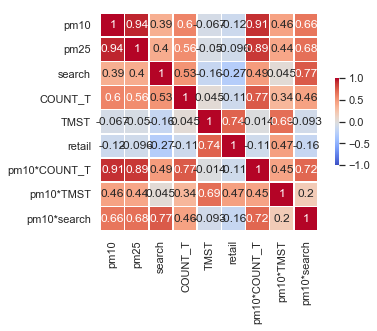

In [13]:
# 히트맵으로 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 3

In [14]:
rawdata1 = rawdata[['pm10','pm25','search','COUNT_T','TMST','retail']]
rawdata1['pm10+search+COUNT_T']=rawdata1['pm10']+rawdata1['search']+rawdata1['COUNT_T']
rawdata1['pm10*search*COUNT_T']=rawdata1['pm10']*rawdata1['search']*rawdata1['COUNT_T']
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+search+COUNT_T,pm10*search*COUNT_T
0,96.467,43.400,0.04172,101.0,3805.420,1.273,197.50872,406.484927
1,67.648,31.915,0.04172,244.0,4258.262,1.216,311.68972,688.634993
2,110.924,71.296,0.04172,192.0,4276.178,1.306,302.96572,888.527862
3,39.515,24.293,0.04172,56.0,3445.193,1.229,95.55672,92.319685
4,20.664,12.441,0.06258,130.0,3258.588,1.382,150.72658,168.109906
5,92.687,65.110,0.06258,313.0,3981.379,1.282,405.74958,1815.510320
6,87.309,61.238,0.06258,273.0,4193.862,1.516,360.37158,1491.616641
7,41.908,27.438,0.06258,228.0,4019.172,1.233,269.97058,597.953402
8,18.190,7.539,0.06258,185.0,4000.379,1.253,203.25258,210.591087
9,10.677,3.328,0.06258,107.0,4224.568,1.327,117.73958,71.493833


In [15]:
# 정규화
rawdata1 = (rawdata1-rawdata1.mean())/rawdata1.std()

In [16]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+search+COUNT_T,pm10*search*COUNT_T
pm10,1.000000,0.942492,0.389581,0.601118,-0.067030,-0.119640,0.731872,0.636943
pm25,0.942492,1.000000,0.403678,0.561144,-0.049735,-0.095586,0.685185,0.667930
search,0.389581,0.403678,1.000000,0.526621,-0.162895,-0.266636,0.534662,0.690746
COUNT_T,0.601118,0.561144,0.526621,1.000000,0.045397,-0.111842,0.984523,0.445339
TMST,-0.067030,-0.049735,-0.162895,0.045397,1.000000,0.738820,0.023966,-0.064638
retail,-0.119640,-0.095586,-0.266636,-0.111842,0.738820,1.000000,-0.121655,-0.123580
pm10+search+COUNT_T,0.731872,0.685185,0.534662,0.984523,0.023966,-0.121655,1.000000,0.519524
pm10*search*COUNT_T,0.636943,0.667930,0.690746,0.445339,-0.064638,-0.123580,0.519524,1.000000


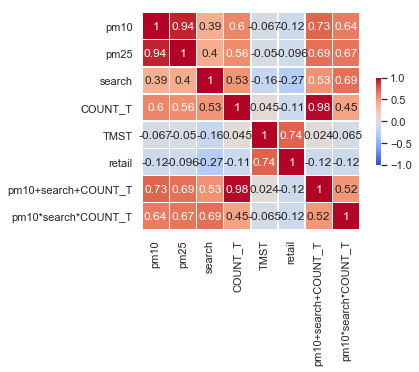

In [17]:
# 히트맵으로 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 4

In [18]:
rawdata1 = rawdata[['pm10','pm25','search','COUNT_T','TMST','retail']]
rawdata1['pm10+COUNT_T+TMST']=rawdata1['pm10']+rawdata1['COUNT_T']+rawdata1['TMST']
rawdata1['pm10*COUNT_T*TMST']=rawdata1['pm10']*rawdata1['COUNT_T']*rawdata1['TMST']
rawdata1['pm10*search*TMST']=rawdata1['pm10']+rawdata1['search']+rawdata1['TMST']
rawdata1['pm10*search*TMST']=rawdata1['pm10']*rawdata1['search']*rawdata1['TMST']
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+COUNT_T+TMST,pm10*COUNT_T*TMST,pm10*search*TMST
0,96.467,43.400,0.04172,101.0,3805.420,1.273,4002.887,3.707684e+07,15315.305662
1,67.648,31.915,0.04172,244.0,4258.262,1.216,4569.910,7.028735e+07,12017.984512
2,110.924,71.296,0.04172,192.0,4276.178,1.306,4579.102,9.107151e+07,19789.079661
3,39.515,24.293,0.04172,56.0,3445.193,1.229,3540.708,7.623661e+06,5679.627354
4,20.664,12.441,0.06258,130.0,3258.588,1.382,3409.252,8.753610e+06,4213.853239
5,92.687,65.110,0.06258,313.0,3981.379,1.282,4387.066,1.155039e+08,23093.401477
6,87.309,61.238,0.06258,273.0,4193.862,1.516,4554.171,9.996220e+07,22914.411537
7,41.908,27.438,0.06258,228.0,4019.172,1.233,4289.080,3.840328e+07,10540.691098
8,18.190,7.539,0.06258,185.0,4000.379,1.253,4203.569,1.346188e+07,4553.752227
9,10.677,3.328,0.06258,107.0,4224.568,1.327,4342.245,4.826311e+06,2822.715491


In [19]:
# 정규화
rawdata1 = (rawdata1-rawdata1.mean())/rawdata1.std()

In [20]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+COUNT_T+TMST,pm10*COUNT_T*TMST,pm10*search*TMST
pm10,1.000000,0.942492,0.389581,0.601118,-0.067030,-0.119640,-0.053483,0.553400,0.589140
pm25,0.942492,1.000000,0.403678,0.561144,-0.049735,-0.095586,-0.037060,0.535568,0.602810
search,0.389581,0.403678,1.000000,0.526621,-0.162895,-0.266636,-0.152931,0.175402,0.586166
COUNT_T,0.601118,0.561144,0.526621,1.000000,0.045397,-0.111842,0.063538,0.509393,0.422563
TMST,-0.067030,-0.049735,-0.162895,0.045397,1.000000,0.738820,0.999830,0.438071,0.171119
retail,-0.119640,-0.095586,-0.266636,-0.111842,0.738820,1.000000,0.736123,0.251454,0.024521
pm10+COUNT_T+TMST,-0.053483,-0.037060,-0.152931,0.063538,0.999830,0.736123,1.000000,0.448058,0.180048
pm10*COUNT_T*TMST,0.553400,0.535568,0.175402,0.509393,0.438071,0.251454,0.448058,1.000000,0.702214
pm10*search*TMST,0.589140,0.602810,0.586166,0.422563,0.171119,0.024521,0.180048,0.702214,1.000000


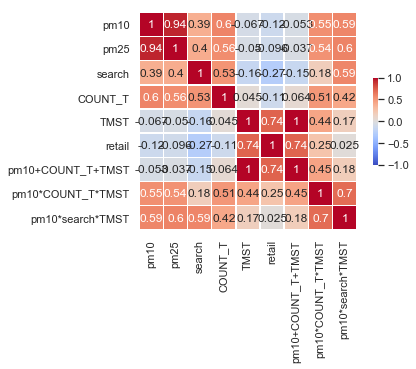

In [21]:
# 히트맵으로 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})

# Try 5

In [22]:
rawdata1 = rawdata[['pm10','pm25','search','COUNT_T','TMST','retail']]
rawdata1['pm10+search+COUNT_T+TMST']=rawdata1['pm10']+rawdata1['search']+rawdata1['COUNT_T']+rawdata1['TMST']
rawdata1['pm10*search*COUNT_T*TMST']=rawdata1['pm10']*rawdata1['search']*rawdata1['COUNT_T']*rawdata1['TMST']
rawdata1

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+search+COUNT_T+TMST,pm10*search*COUNT_T*TMST
0,96.467,43.400,0.04172,101.0,3805.420,1.273,4002.92872,1.546846e+06
1,67.648,31.915,0.04172,244.0,4258.262,1.216,4569.95172,2.932388e+06
2,110.924,71.296,0.04172,192.0,4276.178,1.306,4579.14372,3.799503e+06
3,39.515,24.293,0.04172,56.0,3445.193,1.229,3540.74972,3.180591e+05
4,20.664,12.441,0.06258,130.0,3258.588,1.382,3409.31458,5.478009e+05
5,92.687,65.110,0.06258,313.0,3981.379,1.282,4387.12858,7.228235e+06
6,87.309,61.238,0.06258,273.0,4193.862,1.516,4554.23358,6.255634e+06
7,41.908,27.438,0.06258,228.0,4019.172,1.233,4289.14258,2.403278e+06
8,18.190,7.539,0.06258,185.0,4000.379,1.253,4203.63158,8.424442e+05
9,10.677,3.328,0.06258,107.0,4224.568,1.327,4342.30758,3.020306e+05


In [23]:
# 정규화
rawdata1 = (rawdata1-rawdata1.mean())/rawdata1.std()

In [24]:
# 상관계수 구하기
cor = rawdata1.corr()
cor

,pm10,pm25,search,COUNT_T,TMST,retail,pm10+search+COUNT_T+TMST,pm10*search*COUNT_T*TMST
pm10,1.000000,0.942492,0.389581,0.601118,-0.067030,-0.119640,-0.053481,0.580734
pm25,0.942492,1.000000,0.403678,0.561144,-0.049735,-0.095586,-0.037058,0.601813
search,0.389581,0.403678,1.000000,0.526621,-0.162895,-0.266636,-0.152927,0.540660
COUNT_T,0.601118,0.561144,0.526621,1.000000,0.045397,-0.111842,0.063540,0.414263
TMST,-0.067030,-0.049735,-0.162895,0.045397,1.000000,0.738820,0.999830,0.122587
retail,-0.119640,-0.095586,-0.266636,-0.111842,0.738820,1.000000,0.736122,0.002966
pm10+search+COUNT_T+TMST,-0.053481,-0.037058,-0.152927,0.063540,0.999830,0.736122,1.000000,0.131383
pm10*search*COUNT_T*TMST,0.580734,0.601813,0.540660,0.414263,0.122587,0.002966,0.131383,1.000000


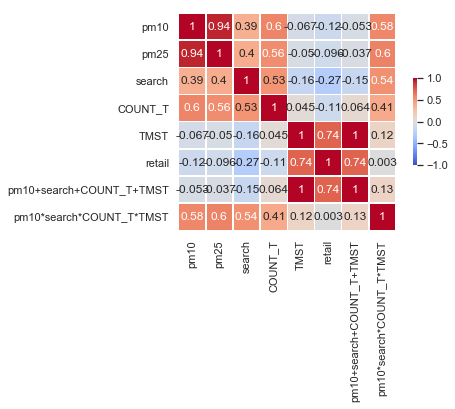

In [25]:
# 히트맵으로 상관계수 시각화
heatmap = sns.heatmap(cor, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {'size': 12})